# Análisis de correlación

In [ ]:
# Instala dependencias
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase8_BaseAnalisisDeCorrelacion.sav

## Visualización de datos

In [1]:
import pandas as pd

df = pd.read_spss("Clase8_BaseAnalisisDeCorrelacion.sav")
df

,Participantes,Bienestar_social,Salud,Resiliencia,Estrés,Depresión
0,001,36.983722,108.111364,4.887907,-15.03,-11.41
1,002,91.805362,137.268316,5.173486,-12.92,-13.84
2,003,35.254443,88.074871,3.501057,-13.83,-10.12
3,004,75.925420,204.576642,3.506270,-7.32,-9.65
4,005,39.223806,146.542058,1.504087,-8.89,-5.55
...,...,...,...,...,...,...
95,096,42.887118,145.048829,4.732098,-11.15,-11.74
96,097,65.297168,76.085918,3.581279,-8.66,-9.59
97,098,50.200543,166.563773,5.075703,-14.34,-12.46
98,099,30.403325,67.443505,3.118402,-8.20,-8.53


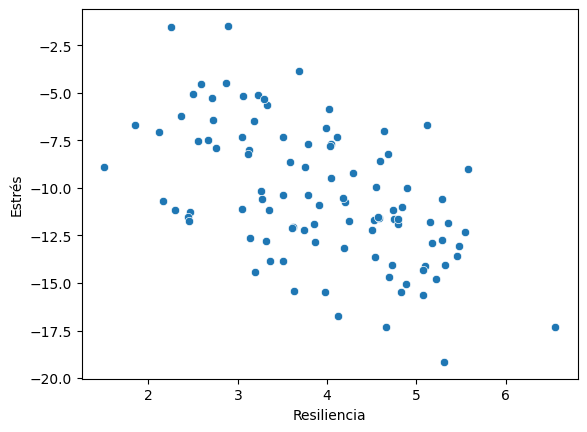

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Resiliencia", y="Estrés", data=df)
plt.show()

## Descripción de los datos

In [3]:
df[["Resiliencia", "Estrés"]].describe()

,Resiliencia,Estrés
count,100.000000,100.000000
mean,3.910544,-10.383400
std,1.021960,3.538318
min,1.504087,-19.150000
25%,3.172530,-12.752500
50%,3.939153,-10.955000
75%,4.730535,-7.655000
max,6.551945,-1.490000


## Análisis de normalidad

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

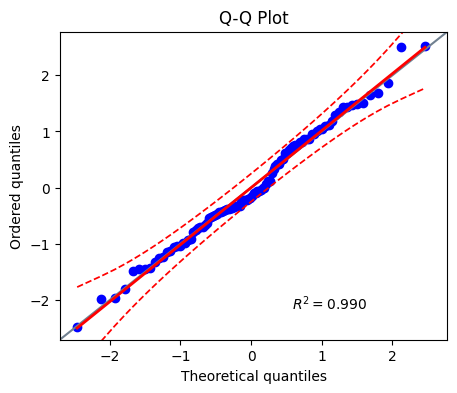

In [4]:
import pingouin as pg

pg.qqplot(df["Estrés"])

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

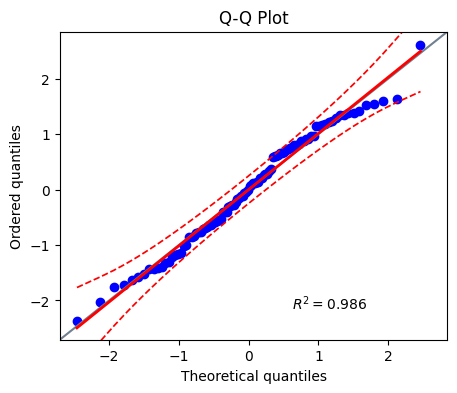

In [5]:
pg.qqplot(df["Resiliencia"])

In [6]:
pg.normality(data=df[["Resiliencia", "Estrés"]], method="shapiro")

,W,pval,normal
Resiliencia,0.983672,0.253783,True
Estrés,0.989079,0.590817,True


In [7]:
print("Postest")
print("Asimetría:", df["Resiliencia"].skew())
print("Curtosis:", df["Estrés"].kurtosis())

Postest
Asimetría: -0.06569547128280581
Curtosis: -0.2592853442627421


In [8]:
print("Pretest")
print("Asimetría:", df["Resiliencia"].skew())
print("Curtosis:", df["Estrés"].kurtosis())

Pretest
Asimetría: -0.06569547128280581
Curtosis: -0.2592853442627421


Ambas distribuciones se aproximan a la distribución normal. Por tanto, corresponde emplear un análisis de correlación paramétrico. En este caso, la correlación de Pearson.

## Análisis de correlación paramétrico

In [9]:
df[["Resiliencia", "Estrés"]].rcorr()

,Resiliencia,Estrés
Resiliencia,-,***
Estrés,-0.544,-


In [10]:
pg.pairwise_corr(columns=["Resiliencia", "Estrés"], method="pearson", data=df)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Resiliencia,Estrés,pearson,two-sided,100,-0.543512,"[-0.67, -0.39]",5.119475e-09,2.521e+06,0.999976


## Ejercicio

1. Plantear las hipótesis de trabajo (HT): analizar por separado cada hipótesis de trabajo puesto que cada una implica un H0 y H1 (hipótesis estadísticas). Ejm.: Se tiene la hipótesis que el bienestar social se asocia negativamente con sintomatología depresiva y con estrés.
- HT1: Bienestar se asocia negativamente con sintomatología depresiva. H0: rxy = 0 , H1: rxy < 0 
- HT2: Bienestar se asocia negativamente con estrés.

2. Plantear las hipótesis estadísticas para cada HT.
3. Explorar el patrón de relación entre las variables con un diagrama de dispersión.
4. Evaluar la normalidad para aplicar el coeficiente de correlación pertinente.
5. Analizar estadísticamente el contraste de hipótesis estadísticas (H0 y H1). Aplica la regla de decisión.
6. Brindar respuesta a las hipótesis de trabajo, indicando si fue una correlación positiva, negativa o no hubo correlación significativa.


### Ejercicio solucionado HT1

Un grupo de investigadoras tiene como hipótesis principal de su estudio que el bienestar social se asocia negativamente con la sintomatología depresiva en un grupo de adultos jóvenes. Indica si se cumple dicha hipótesis.

1. Plantear la hipótesis de trabajo (HT1): 

El bienestar social se asocia negativamente con la sintomatología depresiva en un grupo de adultos jóvenes.

2. Plantear las hipótesis estadísticas de la HT1.
- H0: No existe asociación entre bienestar social y sintomatología depresiva, $r_{xy} = 0$ 
- H1: Existe una asociación negativa entre BS y SD, $r_{xy} < 0$, p unilateral.

3. Explorar el patrón de relación entre las variables con un diagrama de dispersión.

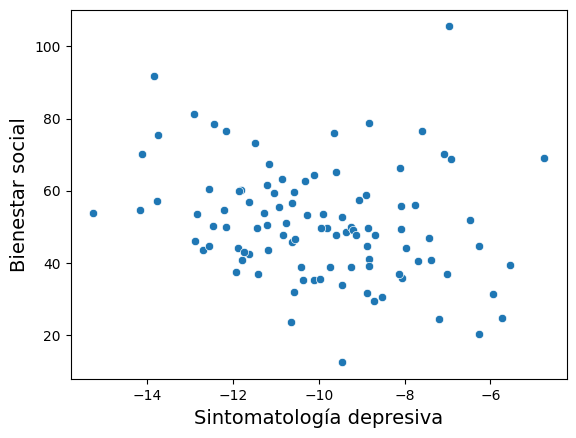

In [15]:
ax = sns.scatterplot(x="Depresión", y="Bienestar_social", data=df)
ax.set_xlabel("Sintomatología depresiva", size=14)
ax.set_ylabel("Bienestar social", size=14)
plt.show()

Se puede observar en la dispersión de puntos cierta tendencia hacia una relación inversa entre las variables. Pero se requiere realizar el contraste de hipótesis para concluir.

4. Evaluar la normalidad para aplicar el coeficiente de correlación pertinente.

In [12]:
pg.normality(data=df[["Depresión", "Bienestar_social"]], method="shapiro")

,W,pval,normal
Depresión,0.994512,0.960469,True
Bienestar_social,0.979953,0.131808,True


El análisis de normalidad indica para bienestar social un SW = .98, p = .132, y para sintomatología depresiva, SW = .995, p = .960, por lo que se acepta H0 y se rechaza H1. Es decir, las distribuciones de ambas variables son normales por lo que se llevará a cabo el análisis de correlación paramétrico de Pearson.

5. Analizar estadísticamente el contraste de hipótesis estadísticas (H0 y H1).  Aplica la regla de decisión.

- H0: $r_{xy} = 0$ 
- H1: $r_{xy} < 0$   , p unilateral 

In [14]:
pg.pairwise_corr(
    columns=["Depresión", "Bienestar_social"],
    method="pearson",
    alternative="less",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Depresión,Bienestar_social,pearson,less,100,-0.245222,"[-1.0, -0.08]",0.006965,4.884,0.797631


- Contraste de hipótesis: Se acepta H1 al encontrar una relación estadísticamente significativa entre bienestar social y sintomatología depresiva, p = .007.

- Sentido: La relación es inversa, es decir, un mayor bienestar social se asocia con un menor nivel de sintomatología depresiva  y viceversa.

- Fortaleza: Según el criterio de Cohen (1988), la magnitud de la relación es pequeña. 

6. Brindar respuesta a las hipótesis de trabajo, indicando si fue una correlación positiva, negativa o no hubo correlación significativa. En caso de darse una correlación significativa, indicar la fortaleza del coeficiente según los criterios de Cohen.

Los resultados del análisis de correlación de Pearson evidencian que existe una relación estadísticamente significativa, negativa y pequeña, según el criterio de Cohen (1988), entre el bienestar social y la sintomatología depresiva, r(98) = -.25, p =.007 (unilateral), por lo que se cumple la hipótesis del estudio.

>Nota: Los grados de libertad de los índices de asociación = n-2.

### Ejercicio solucionado HT2

1. Plantear la hipótesis de trabajo (HT2): 

El bienestar social se asocia negativamente con el estrés en un grupo de adultos jóvenes.

2. Plantear las hipótesis estadísticas de la HT2.

- H0: No existe asociación entre bienestar social y estrés, $r_{xy} = 0$ 
- H1: Existe una asociación negativa entre BS y E, $r_{xy} < 0$, p unilateral.

3. Explorar el patrón de relación entre las variables con un diagrama de dispersión.

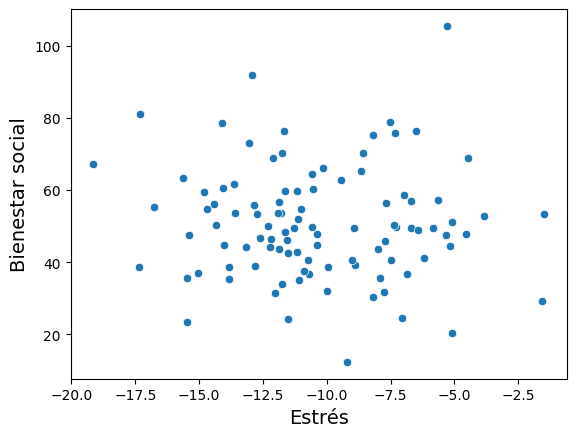

In [16]:
ax = sns.scatterplot(x="Estrés", y="Bienestar_social", data=df)
ax.set_xlabel("Estrés", size=14)
ax.set_ylabel("Bienestar social", size=14)
plt.show()

Se puede observar en la dispersión de puntos cierta tendencia hacia una relación inversa entre las variables. Pero se requiere realizar el contraste de hipótesis para concluir.

4. Evaluar la normalidad para aplicar el coeficiente de correlación pertinente.

In [18]:
pg.normality(data=df[["Estrés", "Bienestar_social"]], method="shapiro")

,W,pval,normal
Estrés,0.989079,0.590817,True
Bienestar_social,0.979953,0.131808,True


El análisis de normalidad indica para bienestar social un SW = .98, p = .132, y para estrés, SW = .989, p = .590, por lo que se acepta H0 y se rechaza H1. Es decir, las distribuciones de ambas variables son normales por lo que se llevará a cabo el análisis de correlación paramétrico de Pearson.

5. Analizar estadísticamente el contraste de hipótesis estadísticas (H0 y H1). Aplica la regla de decisión.

- H0: $r_{xy} = 0$ 
- H1: $r_{xy} < 0$   , p unilateral 

In [19]:
pg.pairwise_corr(
    columns=["Estrés", "Bienestar_social"],
    method="pearson",
    alternative="less",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Estrés,Bienestar_social,pearson,less,100,-0.054747,"[-1.0, 0.11]",0.294256,0.203,0.135243


- Contraste de hipótesis: Se acepta H0 al no encontrar una relación estadísticamente significativa entre bienestar social y estrés, p = .294.

- Sentido: La relación es inversa, es decir, un mayor bienestar social se asociaría con un menor nivel de estrés y viceversa.

- Fortaleza: Según el criterio de Cohen (1988), la magnitud de la relación es irrelevante. 

6. Brindar respuesta a las hipótesis de trabajo, indicando si fue una correlación positiva, negativa o no hubo correlación significativa. En caso de darse una correlación significativa, indicar la fortaleza del coeficiente según los criterios de Cohen.

Los resultados del análisis de correlación de Pearson evidencian que no existe una relación estadísticamente significativa entre el bienestar social y el estrés, r(98) = -.05, p =.294 (unilateral), por lo que no se cumple la hipótesis del estudio.

>Nota: Los grados de libertad de los índices de asociación = n-2.